<a href="https://colab.research.google.com/github/shubhangi-singh21/Data-Science/blob/master/Data_Visualization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading Dataset

Getting the dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset2.csv to Dataset2 (1).csv


In [ ]:
# importing libraries
import io
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# reading the dataset

df = pd.read_csv(io.BytesIO(uploaded['Dataset2.csv']))

For the sake of simplicity, we consider only the target variable and 4 feature variables.

In [ ]:
cols = ["TARGET_deathRate", "avgDeathsPerYear", "incidenceRate", "AvgHouseholdSize", "BirthRate"]

data = df[cols].copy()

In [ ]:
data.head()

In [ ]:
data.describe()

## Skewness

![Skewness](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/434px-Relationship_between_mean_and_median_under_different_skewness.png)

Skewness < -1, negative skewed.

Skewness > 1, positive skewed.

Skewness in [-1, 1], symmetric.

In [ ]:
data.skew()

# Visualising the Distribution

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

First, we want to observe the distribution of the target variable on 3 parameters - symmetricity, skewness and modality. 

A histogram is used for that purpose.

In [ ]:
plt.hist(data.TARGET_deathRate)
plt.title("Histogram of target variable")
plt.xlabel("Death Rate")
plt.ylabel("Frequency")
plt.show()

With 10 classes, the distribution of the variable is not really clear. So, the no. of classes is increased.

In [ ]:
plt.hist(data.TARGET_deathRate, bins=100)
plt.title("Histogram of target variable with 100 classes")
plt.xlabel("Death Rate")
plt.ylabel("Frequency")
plt.show()

From this histogram with 100 classes, it seems that the distribution is normal and there does not seem to be any skewness. There is a single mode in the distribution.


Next, we consider the feature "avgDeathsPerYear". 

In [ ]:
plt.hist(data.avgDeathsPerYear, bins=1000)
plt.xlim(0, 500)
plt.show()

Observation : 

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Kernel Density Estimation Plot : [Kernel density estimation](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) is a non-parametric method of estimating the probability density function (PDF) of a continuous random variable. 

Probability density is the relationship between observations and their probability.The probability of a value being between the points x1 and x2 is the total shaded area of the curve under the two points.

In [ ]:
sns.kdeplot(data.avgDeathsPerYear)
plt.xlim(0, 2000)

Observation : 

The next feature to be considered is "AvgHouseholdSize".

In [ ]:
plt.hist(data.AvgHouseholdSize, bins=100)
plt.xlim(0, 4)
plt.show()

In [ ]:
sns.kdeplot(data.AvgHouseholdSize)

Observation : 

# Kurtosis

Kurtosis : steepness of peaks, broadness of tails

![Kurtosis](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSELD7UKm7nrpgS5x2c9E1x6RlndFovKdjjgr54xAVosJQjjz0Y)

If kurtosis < 3, platykurtic. If kurtosis > 3, leptokurtic.

In [ ]:
data.kurtosis()

Observation :


# Subplots

We can also make figures in subplots.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(data.avgDeathsPerYear)
axs[1, 0].hist(data.incidenceRate)
axs[0, 1].hist(data.AvgHouseholdSize)
axs[1, 1].hist(data.BirthRate)

axs[0, 0].set_title('First Plot')
axs[1, 0].set_title('Second Plot')
axs[0, 1].set_title('Third Plot')
axs[1, 1].set_title('Fourth Plot')

axs[0, 0].set_xlabel('First Plot')
axs[1, 0].set_xlabel('Second Plot')
axs[0, 1].set_xlabel('Third Plot')
axs[1, 1].set_xlabel('Fourth Plot')

plt.show()

In [ ]:
sns.kdeplot(data.TARGET_deathRate)
plt.show()
sns.kdeplot(data.incidenceRate)
plt.show()
sns.kdeplot(data.BirthRate)

## Correlation

A measure of the strength of linear relationship of two variables. 



In [ ]:
data.corr()

,TARGET_deathRate,avgDeathsPerYear,incidenceRate,AvgHouseholdSize,BirthRate
TARGET_deathRate,1.000000,-0.090715,0.449432,-0.036905,-0.087407
avgDeathsPerYear,-0.090715,1.000000,0.062690,0.086161,-0.074420
incidenceRate,0.449432,0.062690,1.000000,-0.118400,-0.118181
AvgHouseholdSize,-0.036905,0.086161,-0.118400,1.000000,0.075918
BirthRate,-0.087407,-0.074420,-0.118181,0.075918,1.000000


In [ ]:
#df.corr()

# Heatmap

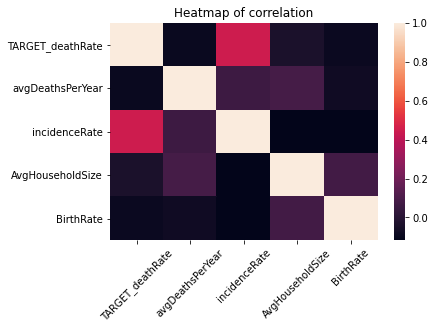

In [ ]:
sns.heatmap(data.corr())
plt.xticks(rotation=45)
plt.title("Heatmap of correlation")
plt.show()

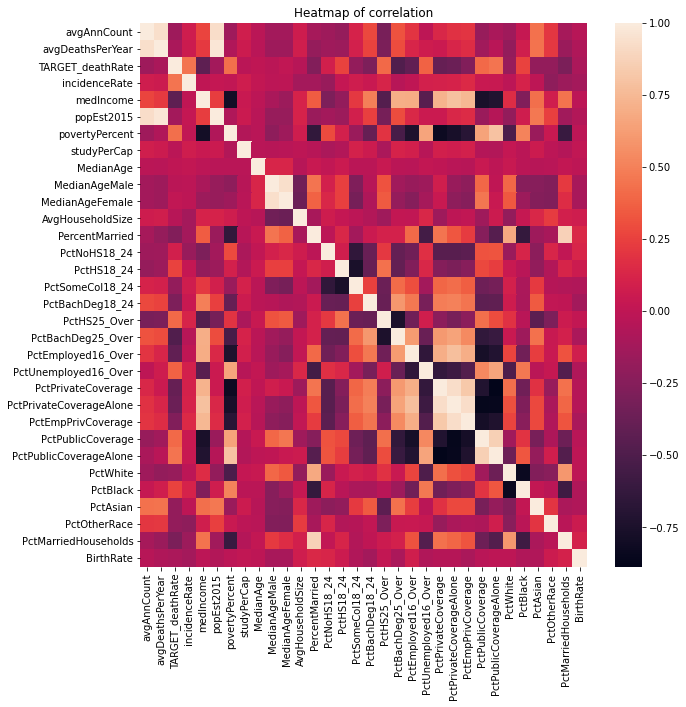

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())
#plt.xticks(rotation=45)
plt.title("Heatmap of correlation")
plt.show()

Observation :

# Pairplot

A way to visualize the distributions and the relationships in the dataframe all at once.

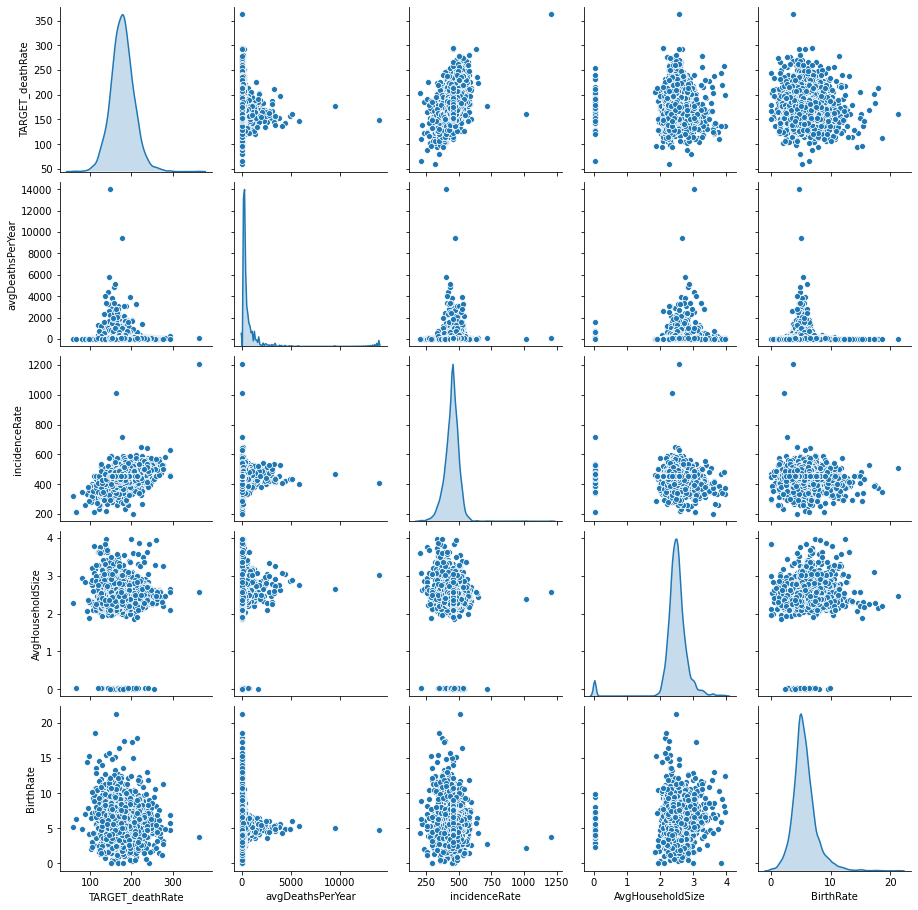

In [ ]:
sns.pairplot(data, diag_kind='kde')

Observation :

# Boxplots

Another way to visualise distributions are boxplots.

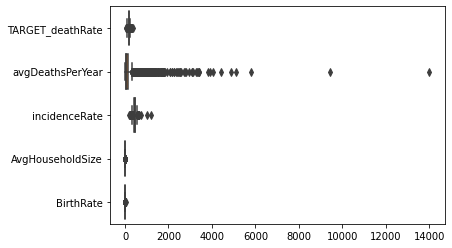

In [ ]:
sns.boxplot(data=data, orient='h')

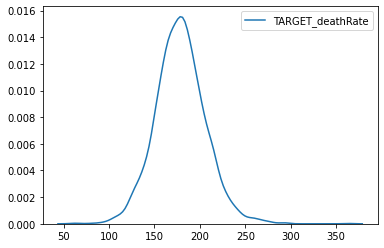

In [ ]:
sns.kdeplot(data.TARGET_deathRate)

But this doesn't really help. So let's just take one at a time.

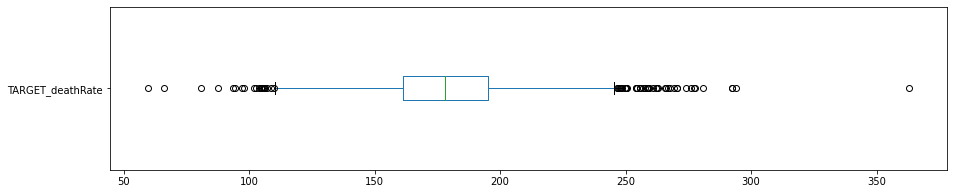

In [ ]:
plt.figure(figsize=(15, 3))
data.boxplot("TARGET_deathRate", vert=0, grid=False)

(0.0, 2000.0)

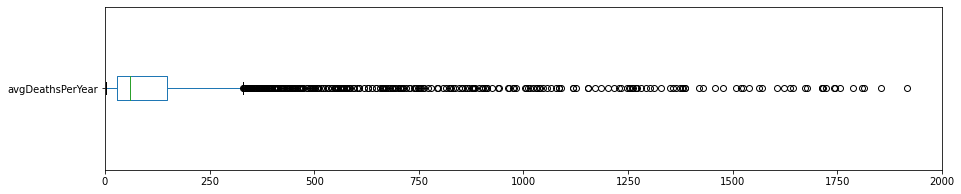

In [ ]:
plt.figure(figsize=(15, 3))
data.boxplot("avgDeathsPerYear", vert=0, grid=False)
plt.xlim(0, 2000)

Observation :

# Visualizations for categorical features

In [ ]:
df.binnedInc

0        (61494.5, 125635]
1       (48021.6, 51046.4]
2       (48021.6, 51046.4]
3         (42724.4, 45201]
4       (48021.6, 51046.4]
               ...        
3042      (45201, 48021.6]
3043    (48021.6, 51046.4]
3044    (51046.4, 54545.6]
3045    (48021.6, 51046.4]
3046    (40362.7, 42724.4]
Name: binnedInc, Length: 3047, dtype: object

In [ ]:
df.binnedInc.value_counts()

(45201, 48021.6]      306
[22640, 34218.1]      306
(54545.6, 61494.5]    306
(48021.6, 51046.4]    305
(42724.4, 45201]      305
(51046.4, 54545.6]    305
(40362.7, 42724.4]    304
(37413.8, 40362.7]    304
(34218.1, 37413.8]    304
(61494.5, 125635]     302
Name: binnedInc, dtype: int64

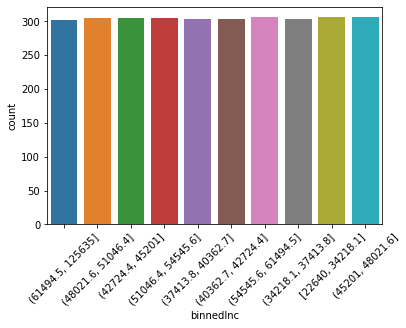

In [ ]:
# A simple frequency diagram

sns.countplot(x="binnedInc", data=df)
plt.xticks(rotation=45)
plt.show()

This is a case of balanced categories, where the count of each class is similar.

Another fancy visualization for categories.

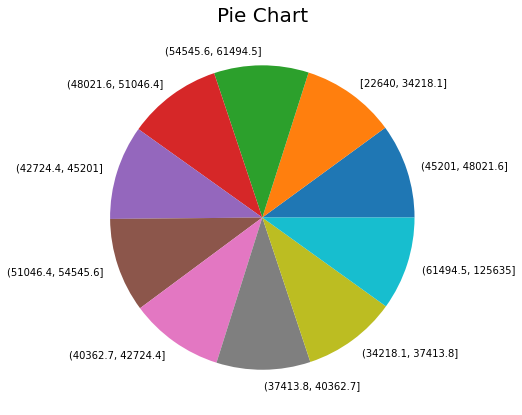

In [ ]:
  labels=df['binnedInc'].value_counts().index
  #explode=[0,0,0.1,0.2,0.3, 0.2, 0.2, 0, 0,0]
  values=df['binnedInc'].value_counts().values

  #visualization
  plt.figure(figsize=(7,7))
  plt.pie(values,labels=labels)
  plt.title('Pie Chart',color='black', fontsize=20)
  plt.show()